In [1]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report

In [2]:
pd.set_option('display.max_columns', None)  # biar semua kolom kelihatan

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"

# tambahkan parameter sep
df = pd.read_csv(url, sep=";")

# tampilkan 5 baris pertama
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
# Shape & data types
print(df.shape)

(4521, 17)


In [5]:
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [6]:
# Missing values
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
# get statistical info from dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84],
       dtype=int64),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137], dtype=int64),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11

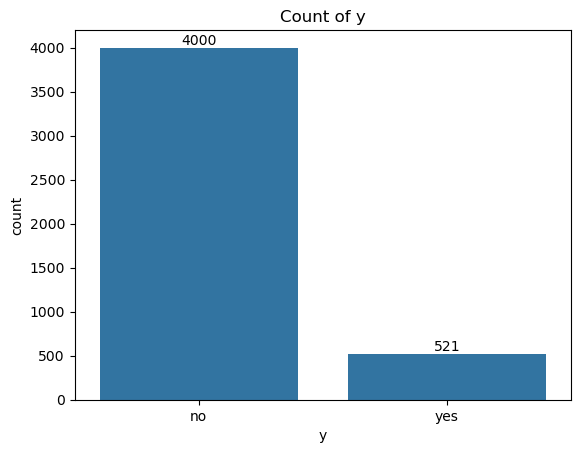

In [9]:
# show how many attrition
ax = sns.countplot(data=df, x='y')
plt.title('Count of y')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# imbalance dataset but it's okay let us try firsttt

# Preprocessing

In [10]:
# Ganti 'unknown' dengan np.nan
df.replace('unknown', np.nan, inplace=True)

# Cek ulang missing
df.isnull().sum()

# Ubah nilai -1 di kolom pdays (ganti -1 jadi NaN)
df['pdays'] = df['pdays'].replace(-1, np.nan)


In [11]:
# Missing values
print(df.isnull().sum())

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays        3705
previous        0
poutcome     3705
y               0
dtype: int64


In [12]:
# Ubah data kategorikal yang null dengan modus
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)

# Kategori baru untuk missing yang informatif
df['pdays'] = df['pdays'].fillna(-1)  # balikin ke -1 untuk nandai "belum pernah dihubungi"
df['poutcome'] = df['poutcome'].fillna('not_contacted')

# Ubah yang null dalam contact anggep aja no contact info
df['contact'] = df['contact'].fillna('no_contact_info')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12728\2280956795.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job'].fillna(df['job'].mode()[0], inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12728\2280956795.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

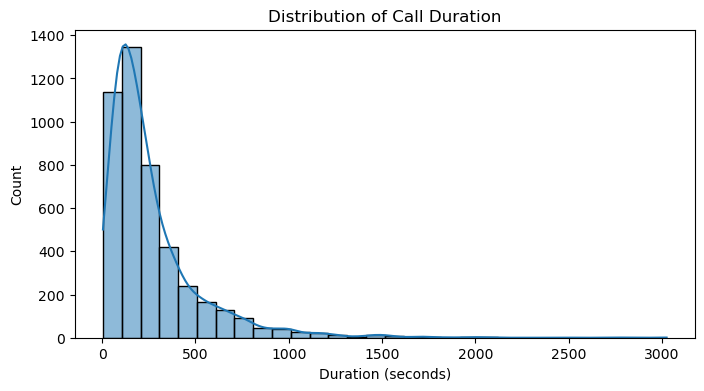

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df['duration'], bins=30, kde=True)
plt.title('Distribution of Call Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()


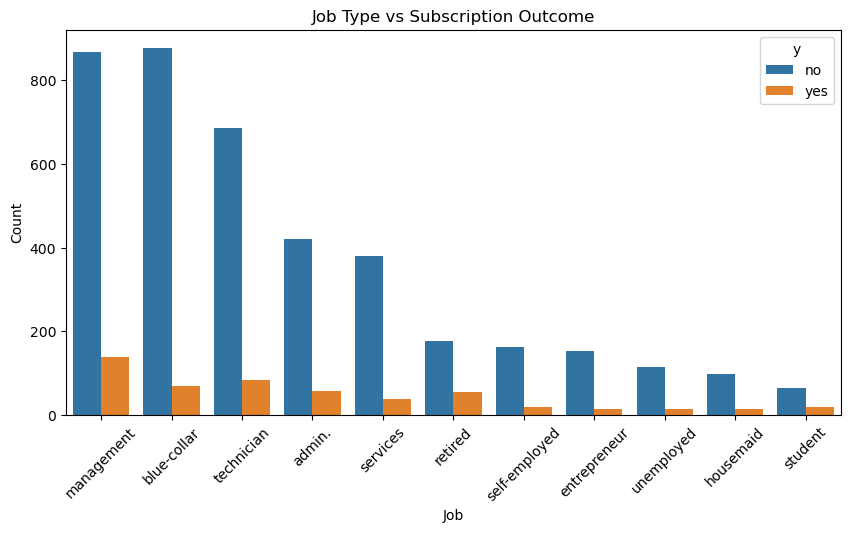

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='job', hue='y', data=df, order=df['job'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Job Type vs Subscription Outcome')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()


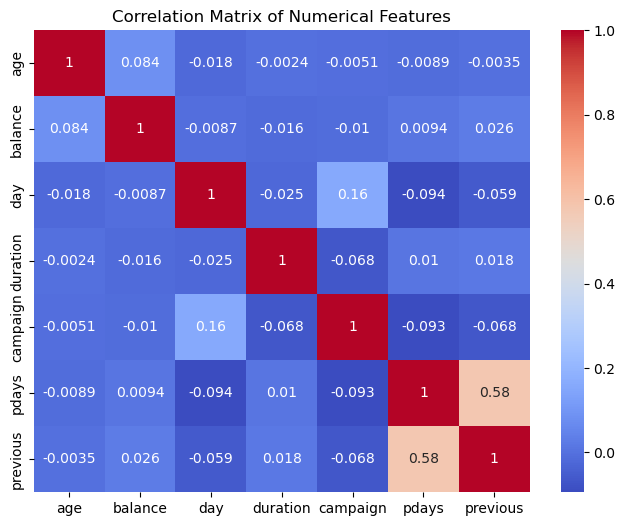

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Feature Encoding

In [16]:
# Salin dataset bersih sebelum encode
df_encoded = df.copy()

# Binary columns
df_encoded['default'] = df_encoded['default'].map({'no': 0, 'yes': 1})
df_encoded['housing'] = df_encoded['housing'].map({'no': 0, 'yes': 1})
df_encoded['loan']    = df_encoded['loan'].map({'no': 0, 'yes': 1})
df_encoded['y']       = df_encoded['y'].map({'no': 0, 'yes': 1})

# Multi-category columns
df_encoded['marital'] = df_encoded['marital'].map({'married': 0, 'single': 1, 'divorced': 2})
df_encoded['education'] = df_encoded['education'].map({'primary': 0, 'secondary': 1, 'tertiary': 2})

job_map = {
    'admin.': 0,
    'blue-collar': 1,
    'technician': 2,
    'services': 3,
    'management': 4,
    'retired': 5,
    'entrepreneur': 6,
    'housemaid': 7,
    'self-employed': 8,
    'unemployed': 9,
    'student': 10
}
df_encoded['job'] = df_encoded['job'].map(job_map)

df_encoded['contact'] = df_encoded['contact'].map({'cellular': 0, 'telephone': 1, 'no_contact_info': 2})
df_encoded['month']   = df_encoded['month'].map({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,
                                                  'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})
df_encoded['poutcome'] = df_encoded['poutcome'].map({'not_contacted':0,'failure':1,'other':2,'success':3})
df_encoded['pdays'] = df_encoded['pdays'].astype(int)

# Cek hasil
df_encoded.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,9,0,0,0,1787,0,0,0,19,9,79,1,-1,0,0,0
1,33,3,0,1,0,4789,1,1,0,11,4,220,1,339,4,1,0
2,35,4,1,2,0,1350,1,0,0,16,3,185,1,330,1,1,0
3,30,4,0,2,0,1476,1,1,2,3,5,199,4,-1,0,0,0
4,59,1,0,1,0,0,1,0,2,5,4,226,1,-1,0,0,0


In [17]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int32
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int32(1), int64(16)
memory usage: 582.9 KB


In [18]:
df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,9,0,0,0,1787,0,0,0,19,9,79,1,-1,0,0,0
1,33,3,0,1,0,4789,1,1,0,11,4,220,1,339,4,1,0
2,35,4,1,2,0,1350,1,0,0,16,3,185,1,330,1,1,0
3,30,4,0,2,0,1476,1,1,2,3,5,199,4,-1,0,0,0
4,59,1,0,1,0,0,1,0,2,5,4,226,1,-1,0,0,0


In [19]:
# checking encode result
df_encoded.loc[480]

age           37
job            4
marital        1
education      1
default        0
balance      715
housing        1
loan           0
contact        2
day           20
month          4
duration     247
campaign       2
pdays         -1
previous       0
poutcome       0
y              0
Name: 480, dtype: int64

## Separate features and target

### Subtask:
Define the features (X) and the target variable (y).


**Reasoning**:
Define the features (X) by dropping the target variable 'y' from the DataFrame and define the target variable (y) as the 'y' column.



In [20]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [21]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,9,0,0,0,1787,0,0,0,19,9,79,1,-1,0,0
1,33,3,0,1,0,4789,1,1,0,11,4,220,1,339,4,1
2,35,4,1,2,0,1350,1,0,0,16,3,185,1,330,1,1
3,30,4,0,2,0,1476,1,1,2,3,5,199,4,-1,0,0
4,59,1,0,1,0,0,1,0,2,5,4,226,1,-1,0,0


In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

## Split data

### Subtask:
Split the encoded data into training and testing sets.


**Reasoning**:
Split the encoded feature DataFrame X and the target Series y into training and testing sets.



In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3616, 16), (905, 16))

In [25]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
978,34,6,2,2,0,262,0,0,0,20,10,371,1,-1,0,0
251,32,4,0,2,0,2349,0,0,0,14,7,134,5,-1,0,0
3139,34,2,1,1,0,1076,0,0,0,8,7,70,2,-1,0,0
1822,31,4,0,2,0,156,0,0,0,13,7,657,7,-1,0,0
4445,46,1,0,0,0,258,1,0,2,27,4,217,1,-1,0,0


In [26]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2398,51,6,0,1,1,-2082,0,1,0,28,6,123,6,-1,0,0
800,50,4,0,2,0,2881,0,0,0,5,7,510,2,2,5,2
2288,50,2,0,1,0,1412,0,0,0,6,7,131,3,-1,0,0
2344,37,4,0,2,0,0,1,0,2,3,5,247,13,-1,0,0
3615,31,0,1,1,0,757,0,0,0,3,1,343,2,-1,0,0


# Decision Tree Classifier Tanpa Hyperparameter

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3193
           1       1.00      1.00      1.00       423

    accuracy                           1.00      3616
   macro avg       1.00      1.00      1.00      3616
weighted avg       1.00      1.00      1.00      3616


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       807
           1       0.43      0.46      0.44        98

    accuracy                           0.88       905
   macro avg       0.68      0.69      0.69       905
weighted avg       0.88      0.88      0.88       905




# Random Forest Classifier Tanpa Hyperparameter

In [28]:
# Inisialisasi model Random Forest
forest = RandomForestClassifier(random_state=0)

# Latih model dengan data training
forest.fit(X_train, y_train)

# Prediksi pada data training dan test
y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)

# Tampilkan hasil evaluasi
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3193
           1       1.00      1.00      1.00       423

    accuracy                           1.00      3616
   macro avg       1.00      1.00      1.00      3616
weighted avg       1.00      1.00      1.00      3616


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.62      0.33      0.43        98

    accuracy                           0.90       905
   macro avg       0.77      0.65      0.69       905
weighted avg       0.89      0.90      0.89       905



# XGBoost Tanpa Hyperparameter

In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Inisialisasi model XGBoost tanpa hyperparameter tambahan
xgb_model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')

# Latih model
xgb_model.fit(X_train, y_train)

# Prediksi data train dan test
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Tampilkan hasil evaluasi
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))



=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3193
           1       1.00      0.99      1.00       423

    accuracy                           1.00      3616
   macro avg       1.00      1.00      1.00      3616
weighted avg       1.00      1.00      1.00      3616


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       807
           1       0.51      0.38      0.43        98

    accuracy                           0.89       905
   macro avg       0.72      0.67      0.69       905
weighted avg       0.88      0.89      0.89       905



c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:34:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [30]:
# Inisialisasi model XGBoost
xgb_model = XGBClassifier(
    random_state=0,
    n_estimators=100,       # jumlah pohon (default 100)
    learning_rate=0.1,      # laju pembelajaran
    max_depth=6,            # kedalaman maksimal tiap pohon
    subsample=1.0,          # proporsi sampel untuk tiap pohon
    colsample_bytree=1.0,   # proporsi fitur untuk tiap pohon
    use_label_encoder=False,
    eval_metric='logloss'   # hindari warning pada versi baru XGBoost
)

# Latih model
xgb_model.fit(X_train, y_train)

# Prediksi data train dan test
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Tampilkan hasil evaluasi
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))

c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:34:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3193
           1       0.97      0.79      0.88       423

    accuracy                           0.97      3616
   macro avg       0.97      0.90      0.93      3616
weighted avg       0.97      0.97      0.97      3616


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       807
           1       0.54      0.38      0.44        98

    accuracy                           0.90       905
   macro avg       0.73      0.67      0.69       905
weighted avg       0.88      0.90      0.89       905



# What to do next?
*   The F1 Score also significantly different so we need to handle this imbalance dataset. <br>
*   The accuracy of training set is 100% and testing set is 88%. This indicates overfitting, therefore we need to apply pre-prunning to the tree. We will tune the parameter by add a max_depth (limiting the depth/ branching of tree) and etc. <br>
*   And maybe we need to select and drop some features for the model.

# Oversampling using SMOTENC

In [31]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = ['job','marital','education','default','housing','loan','contact','month','poutcome']

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((6400, 16), (1600, 16))

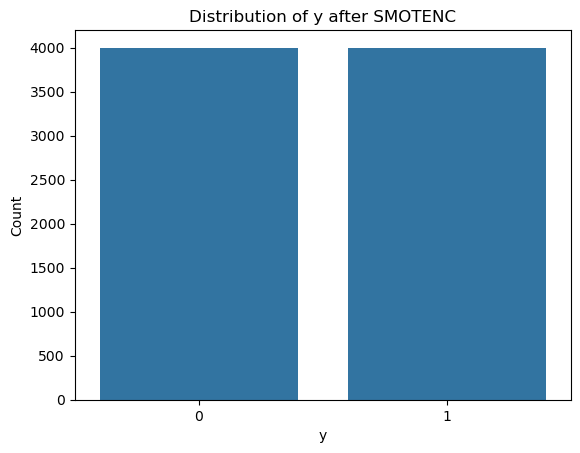

In [32]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y)
plt.title('Distribution of y after SMOTENC')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int64  
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4521 non-null   int64  
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4521 non-null   object 
 9   day        4521 non-null   int64  
 10  month      4521 non-null   object 
 11  duration   4521 non-null   int64  
 12  campaign   4521 non-null   int64  
 13  pdays      4521 non-null   float64
 14  previous   4521 non-null   int64  
 15  poutcome   4521 non-null   object 
 16  y          4521 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 600.6+ KB


# Decision Tree Classifier

In [34]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3199
           1       1.00      1.00      1.00      3201

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       801
           1       0.88      0.91      0.89       799

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600



# Random Forest Classifier

In [35]:
# Inisialisasi model Random Forest
forest = RandomForestClassifier(random_state=0)

# Latih model dengan data training
forest.fit(X_train, y_train)

# Prediksi pada data training dan test
y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)

# Tampilkan hasil evaluasi
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3199
           1       1.00      1.00      1.00      3201

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       801
           1       0.91      0.94      0.93       799

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



# XGBoost

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Inisialisasi model XGBoost tanpa hyperparameter tambahan
xgb_model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')

# Latih model
xgb_model.fit(X_train, y_train)

# Prediksi data train dan test
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Tampilkan hasil evaluasi
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))



=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3199
           1       1.00      1.00      1.00      3201

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       801
           1       0.91      0.95      0.93       799

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:34:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Wow the performance is getting higher, but i want to handle overfitting by using KFold Cross Validation

# KFold Cross Validation

In [37]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 6400, Test set:1600
Fold:2, Train set: 6400, Test set:1600
Fold:3, Train set: 6400, Test set:1600
Fold:4, Train set: 6400, Test set:1600
Fold:5, Train set: 6400, Test set:1600


# Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.89312039 0.8865598  0.9010989  0.86142322 0.88613861]
Average score: 0.89


# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=42)

rf_scores = cross_val_score(rf, X, y, cv=kf, scoring="f1")
print(f'Random Forest F1 Scores per fold: {rf_scores}')
print(f'Random Forest Average F1 Score: {"{:.2f}".format(rf_scores.mean())}')

Random Forest F1 Scores per fold: [0.92865929 0.93487523 0.9261745  0.90580162 0.9304878 ]
Random Forest Average F1 Score: 0.93


# XGBoost

In [40]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb_scores = cross_val_score(xgb, X, y, cv=kf, scoring="f1")
print(f'XGBoost F1 Scores per fold: {xgb_scores}')
print(f'XGBoost Average F1 Score: {"{:.2f}".format(xgb_scores.mean())}')


c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:34:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:34:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:34:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:34:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

XGBoost F1 Scores per fold: [0.93054702 0.9375     0.93603936 0.91170946 0.93746205]
XGBoost Average F1 Score: 0.93


c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:34:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Feature Importance

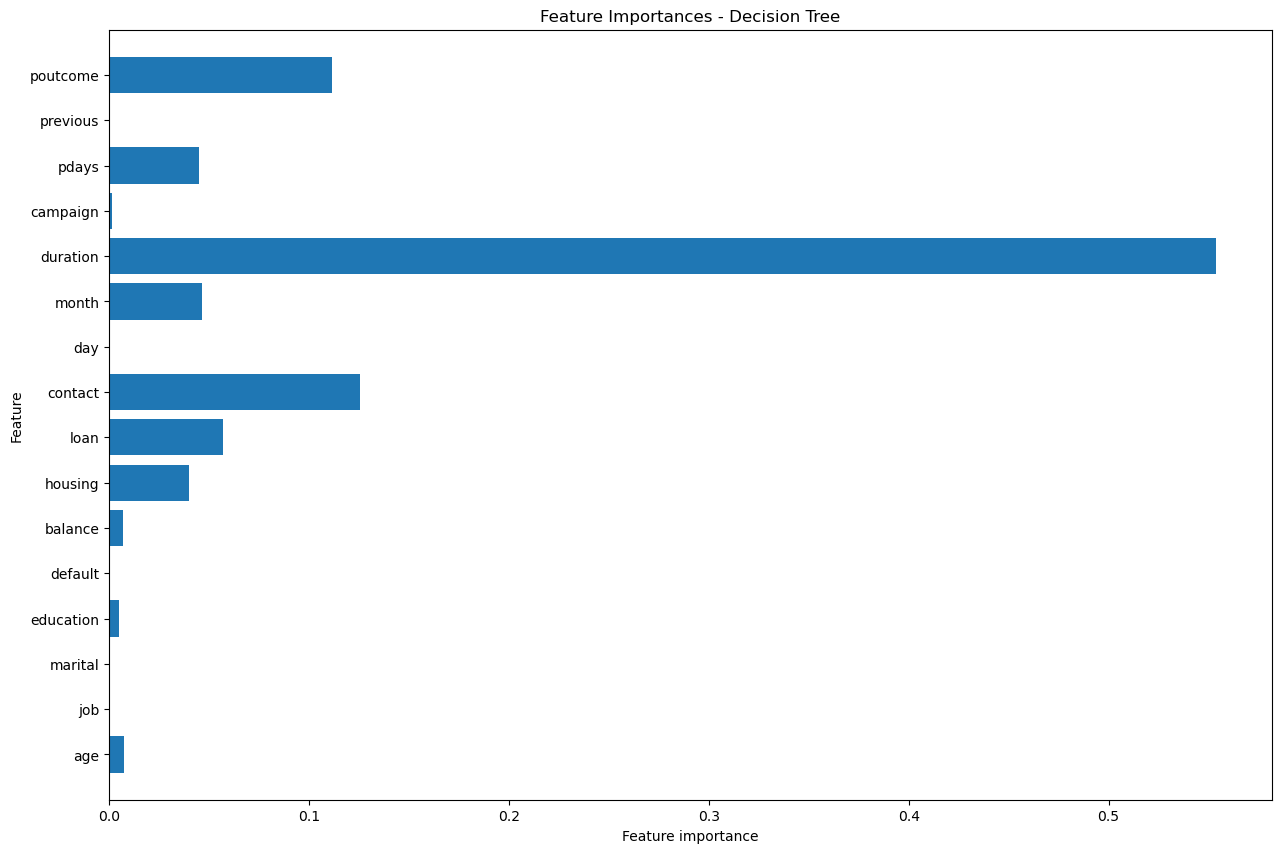

In [41]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
tree.fit(X_train, y_train)

# Visualization
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Feature Importances - Decision Tree")
    plt.show()

plot_feature_importances_attrition(tree)


In [42]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

duration    0.553770
contact     0.125286
poutcome    0.111723
loan        0.057227
dtype: float64

In [43]:
# using only important features for the prediction
important_features = [
    'duration',
    'contact',
    'poutcome',
    'loan'
]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded["y"] #target

In [44]:
display(X_importance)
display(y_importance)

,duration,contact,poutcome,loan
0,79,0,0,0
1,220,0,1,1
2,185,0,1,0
3,199,2,0,1
4,226,2,0,0
...,...,...,...,...
4516,329,0,0,0
4517,153,2,0,1
4518,151,0,0,0
4519,129,0,2,0


0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_importance, y_importance = smote.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.2, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((6400, 4), (1600, 4))

In [46]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.2, random_state=50)

# Decision Tree Classifier

In [47]:
importance_tree = DecisionTreeClassifier(random_state=50)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3238
           1       0.91      0.91      0.91      3162

    accuracy                           0.91      6400
   macro avg       0.91      0.91      0.91      6400
weighted avg       0.91      0.91      0.91      6400


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       762
           1       0.81      0.83      0.82       838

    accuracy                           0.81      1600
   macro avg       0.81      0.81      0.81      1600
weighted avg       0.81      0.81      0.81      1600



# Random Forest Classifier

In [48]:
importance_forest = RandomForestClassifier(random_state=50)
importance_forest.fit(X_train_importance, y_train_importance)

# Prediksi
y_pred_train_forest = importance_forest.predict(X_train_importance)
y_pred_test_forest = importance_forest.predict(X_test_importance)

# Evaluasi
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_forest))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_forest))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3238
           1       0.89      0.93      0.91      3162

    accuracy                           0.91      6400
   macro avg       0.91      0.91      0.91      6400
weighted avg       0.91      0.91      0.91      6400


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       762
           1       0.81      0.86      0.84       838

    accuracy                           0.82      1600
   macro avg       0.83      0.82      0.82      1600
weighted avg       0.82      0.82      0.82      1600



# XGBoost

In [49]:
importance_xgb = XGBClassifier(random_state=50, use_label_encoder=False, eval_metric='logloss')
importance_xgb.fit(X_train_importance, y_train_importance)

# Prediksi
y_pred_train_xgb = importance_xgb.predict(X_train_importance)
y_pred_test_xgb = importance_xgb.predict(X_test_importance)

# Evaluasi
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_xgb))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_xgb))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      3238
           1       0.83      0.90      0.86      3162

    accuracy                           0.86      6400
   macro avg       0.86      0.86      0.86      6400
weighted avg       0.86      0.86      0.86      6400


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       762
           1       0.82      0.87      0.85       838

    accuracy                           0.83      1600
   macro avg       0.84      0.83      0.83      1600
weighted avg       0.83      0.83      0.83      1600



c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:34:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


i still want to increase the score since this way is seems worse than before, so i will try to select predictor or X features based on the correlation

# Selecting Predictors/Features Based on Correlation

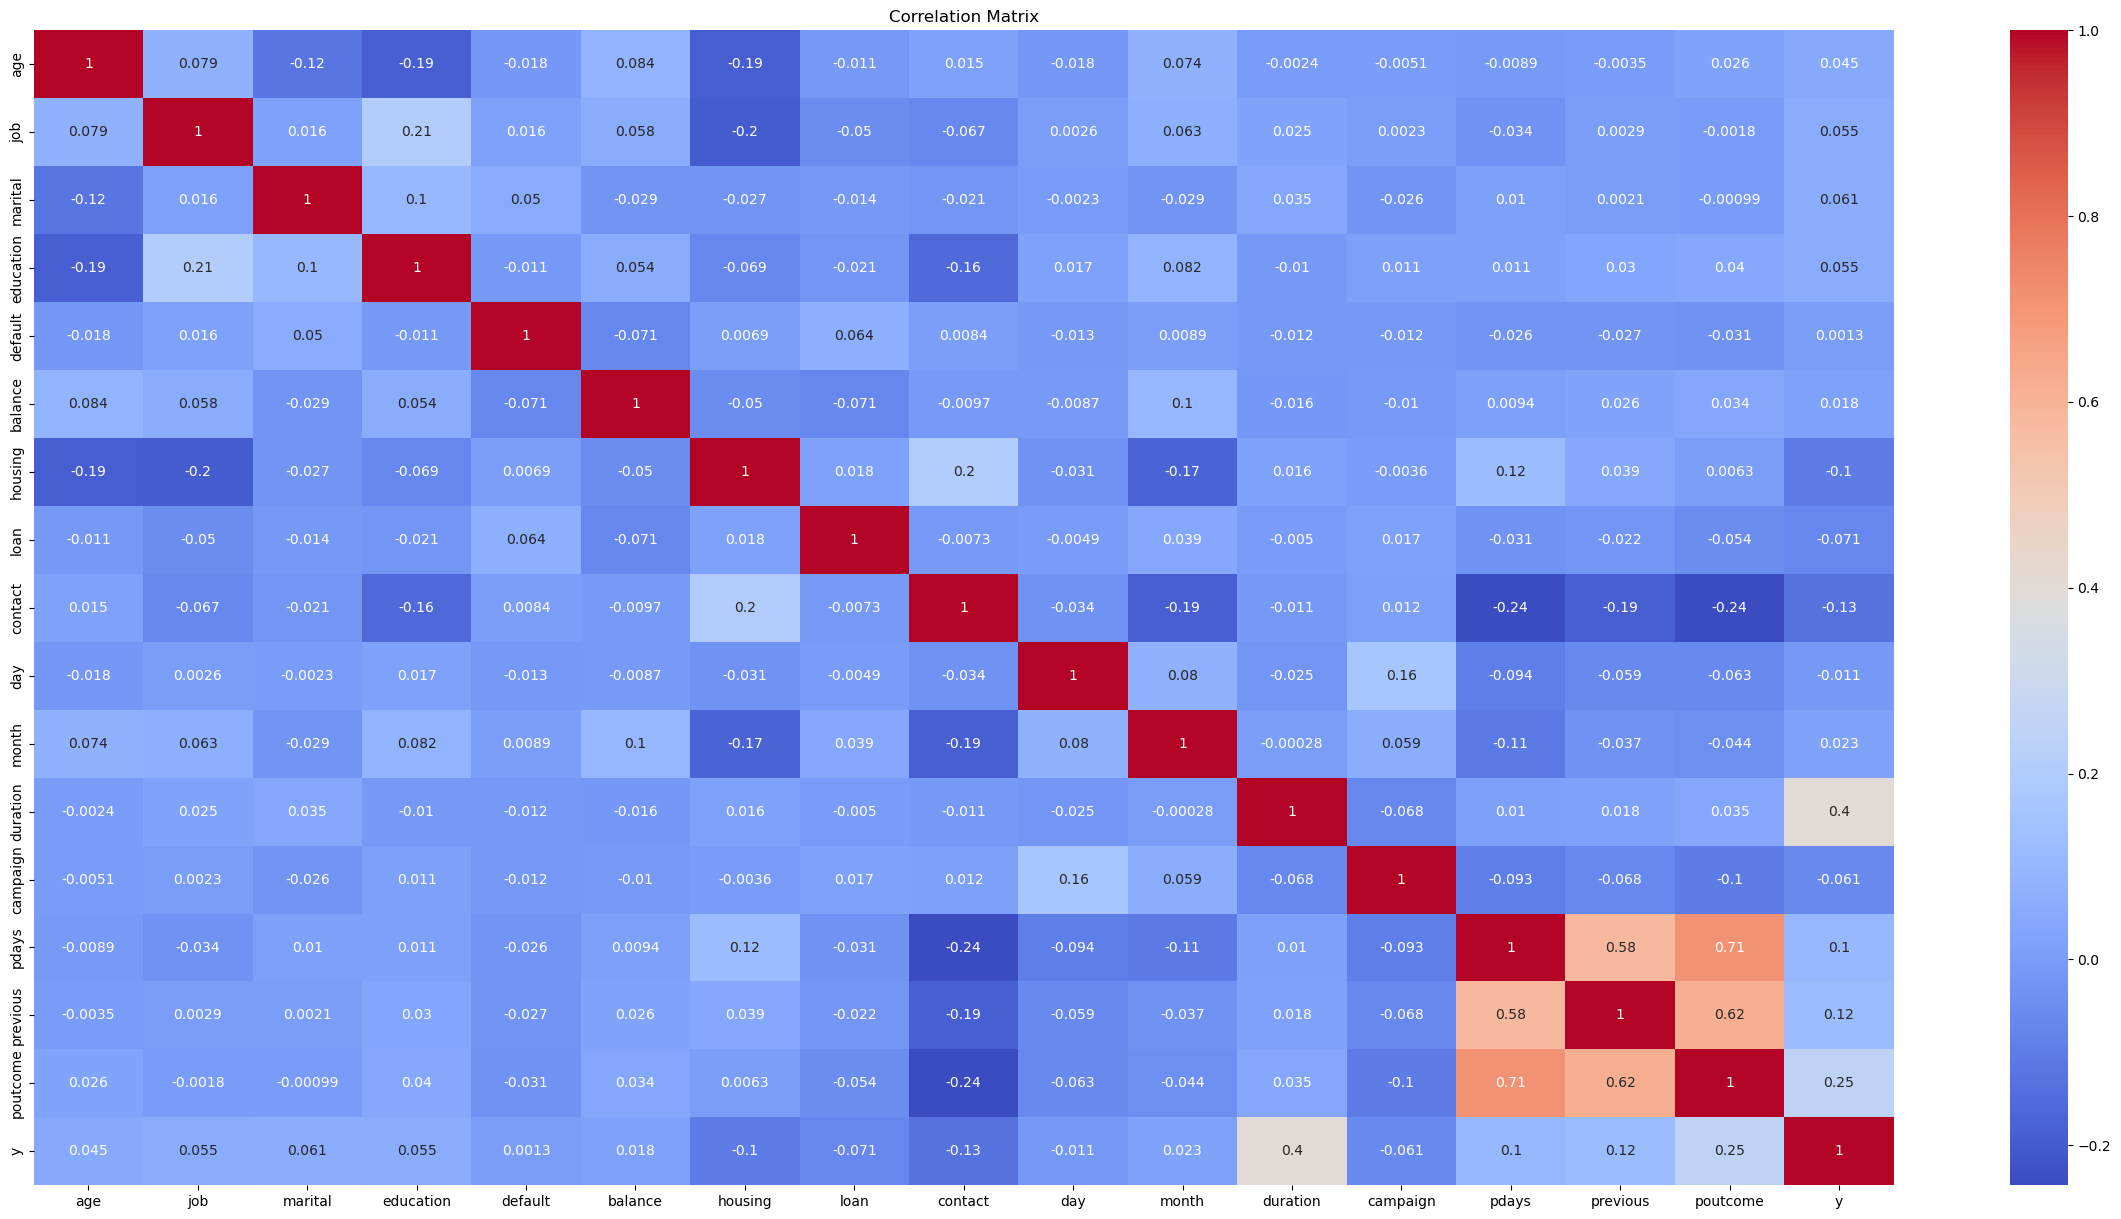

In [50]:
# show heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [51]:
# mencari korelasi yang tinggi
corr_matrix = df_encoded.corr().abs()

# "Buka" matriks agar tidak ada pasangan duplikat (A-B & B-A) dan hapus korelasi diagonal (selalu 1)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
sorted_corr = upper_tri.stack().sort_values(ascending=False)

# Tentukan ambang batas korelasi yang Anda anggap tinggi
threshold = 0.5

# Ambil semua pasangan yang korelasinya di atas ambang batas
high_corr_pairs = sorted_corr[sorted_corr > threshold]

print(f"--- Pasangan Fitur dengan Korelasi > {threshold} ---")
if high_corr_pairs.empty:
    print("Tidak ditemukan pasangan fitur dengan korelasi di atas ambang batas.")
else:
    print(high_corr_pairs)

--- Pasangan Fitur dengan Korelasi > 0.5 ---
pdays     poutcome    0.711144
previous  poutcome    0.617602
pdays     previous    0.577562
dtype: float64


In [52]:
heatmap_features = [
    'pdays',
    'previous',
    'poutcome'
]
X_heatmap = df_encoded[heatmap_features] #input
y_heatmap = df_encoded['y'] #target

In [53]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

# Definisikan fitur kategorikal sesuai kolom yang ada di X_heatmap
categorical_features_in_heatmap = ['poutcome']

# Pastikan hanya ambil kolom yang benar-benar ada di X_heatmap
categorical_indices = [
    X_heatmap.columns.get_loc(col)
    for col in categorical_features_in_heatmap
    if col in X_heatmap.columns
]

# Gunakan SMOTENC untuk oversampling
smotenc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_heatmap_res, y_heatmap_res = smotenc.fit_resample(X_heatmap, y_heatmap)

In [54]:
# Split dataset hasil SMOTENC
X_train, X_test, y_train, y_test = train_test_split(
    X_heatmap_res, y_heatmap_res, test_size=0.2, random_state=17
)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((6400, 3), (1600, 3))

# Decision Tree Classifier

In [55]:
# i build a model based on best feature by correlation
heatmap_tree = DecisionTreeClassifier(random_state=42)
heatmap_tree.fit(X_train, y_train)

y_pred_train = heatmap_tree.predict(X_train)
y_pred_test = heatmap_tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.60      0.99      0.75      3186
           1       0.98      0.34      0.51      3214

    accuracy                           0.67      6400
   macro avg       0.79      0.67      0.63      6400
weighted avg       0.79      0.67      0.63      6400


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.58      0.94      0.72       814
           1       0.82      0.29      0.43       786

    accuracy                           0.62      1600
   macro avg       0.70      0.61      0.57      1600
weighted avg       0.70      0.62      0.57      1600



# Random Forest Classifier

In [56]:
heatmap_forest = RandomForestClassifier(random_state=42)
heatmap_forest.fit(X_train, y_train)

# Prediksi
y_pred_train_forest = heatmap_forest.predict(X_train)
y_pred_test_forest = heatmap_forest.predict(X_test)

# Evaluasi
print("\n=== Classification Report (Training Set - Random Forest) ===")
print(classification_report(y_train, y_pred_train_forest))

print("\n=== Classification Report (Test Set - Random Forest) ===")
print(classification_report(y_test, y_pred_test_forest))


=== Classification Report (Training Set - Random Forest) ===
              precision    recall  f1-score   support

           0       0.60      0.98      0.75      3186
           1       0.95      0.35      0.52      3214

    accuracy                           0.67      6400
   macro avg       0.78      0.67      0.63      6400
weighted avg       0.78      0.67      0.63      6400


=== Classification Report (Test Set - Random Forest) ===
              precision    recall  f1-score   support

           0       0.59      0.94      0.72       814
           1       0.83      0.32      0.46       786

    accuracy                           0.63      1600
   macro avg       0.71      0.63      0.59      1600
weighted avg       0.71      0.63      0.59      1600



# XGBoost

In [57]:
heatmap_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
heatmap_xgb.fit(X_train, y_train)

# Prediksi
y_pred_train_xgb = heatmap_xgb.predict(X_train)
y_pred_test_xgb = heatmap_xgb.predict(X_test)

# Evaluasi
print("\n=== Classification Report (Training Set - XGBoost) ===")
print(classification_report(y_train, y_pred_train_xgb))

print("\n=== Classification Report (Test Set - XGBoost) ===")
print(classification_report(y_test, y_pred_test_xgb))


=== Classification Report (Training Set - XGBoost) ===
              precision    recall  f1-score   support

           0       0.59      0.97      0.74      3186
           1       0.92      0.35      0.50      3214

    accuracy                           0.66      6400
   macro avg       0.76      0.66      0.62      6400
weighted avg       0.76      0.66      0.62      6400


=== Classification Report (Test Set - XGBoost) ===
              precision    recall  f1-score   support

           0       0.58      0.93      0.72       814
           1       0.82      0.31      0.45       786

    accuracy                           0.63      1600
   macro avg       0.70      0.62      0.59      1600
weighted avg       0.70      0.63      0.59      1600



c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:34:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Hyperparameter Tuning using Grid Search

# Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# split dulu (data sudah di-oversample dengan SMOTENC)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# parameter grid untuk tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# buat DecisionTree
tree = DecisionTreeClassifier(random_state=42)

# GridSearch dengan 5-fold CV
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# fitting
grid_search.fit(X_train, y_train)

# best model
best_tree = grid_search.best_estimator_

# prediksi
y_pred_train = best_tree.predict(X_train)
y_pred_test = best_tree.predict(X_test)

# laporan performa
print("Best parameters:", grid_search.best_params_)
print("Best CV F1 score:", grid_search.best_score_)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV F1 score: 0.8764861827494668

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3199
           1       0.98      0.99      0.98      3201

    accuracy                           0.98      6400
   macro avg       0.98      0.98      0.98      6400
weighted avg       0.98      0.98      0.98      6400


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       801
           1       0.87      0.91      0.89       799

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600



# Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Parameter grid untuk Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Model Random Forest
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# Fitting
grid_search_rf.fit(X_train, y_train)

# Best model
best_rf = grid_search_rf.best_estimator_

# Prediksi
y_pred_train_rf = best_rf.predict(X_train)
y_pred_test_rf = best_rf.predict(X_test)

# Evaluasi
print("Best parameters (RF):", grid_search_rf.best_params_)
print("Best CV F1 score (RF):", grid_search_rf.best_score_)

print("\n=== Classification Report (Training Set - RF) ===")
print(classification_report(y_train, y_pred_train_rf))

print("\n=== Classification Report (Test Set - RF) ===")
print(classification_report(y_test, y_pred_test_rf))


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
223 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\LENOVO\anaconda3\Lib\site-

Best parameters (RF): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV F1 score (RF): 0.9242467158816154

=== Classification Report (Training Set - RF) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3199
           1       1.00      1.00      1.00      3201

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400


=== Classification Report (Test Set - RF) ===
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       801
           1       0.91      0.95      0.93       799

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



# XGBoost

In [60]:
from xgboost import XGBClassifier

# Parameter grid untuk XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Model XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# Fitting
grid_search_xgb.fit(X_train, y_train)

# Best model
best_xgb = grid_search_xgb.best_estimator_

# Prediksi
y_pred_train_xgb = best_xgb.predict(X_train)
y_pred_test_xgb = best_xgb.predict(X_test)

# Evaluasi
print("Best parameters (XGB):", grid_search_xgb.best_params_)
print("Best CV F1 score (XGB):", grid_search_xgb.best_score_)

print("\n=== Classification Report (Training Set - XGB) ===")
print(classification_report(y_train, y_pred_train_xgb))

print("\n=== Classification Report (Test Set - XGB) ===")
print(classification_report(y_test, y_pred_test_xgb))


c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:36:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters (XGB): {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Best CV F1 score (XGB): 0.9345583938377903

=== Classification Report (Training Set - XGB) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3199
           1       1.00      1.00      1.00      3201

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400


=== Classification Report (Test Set - XGB) ===
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       801
           1       0.93      0.95      0.94       799

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600



#  Model Evaluation

### 1. Models without Hyperparameters

| **Model**          | **Accuracy** | **Precision** | **Recall** | **F1-Score** |
| ------------------ | ------------ | ------------- | ---------- | ------------ |
| Decision Tree       | 0.88         | 0.88          | 0.88       | 0.88         |
| Random Forest       | 0.90         | 0.89          | 0.90       | 0.89         |
| XGBoost             | 0.89         | 0.88          | 0.89       | 0.89         |

### 2. Models After SMOTENC

| **Model**          | **Accuracy** | **Precision** | **Recall** | **F1-Score** |
| ------------------ | ------------ | ------------- | ---------- | ------------ |
| Decision Tree       | 0.89         | 0.89          | 0.89       | 0.89         |
| Random Forest       | 0.93         | 0.93          | 0.93       | 0.93         |
| XGBoost             | 0.93         | 0.93          | 0.93       | 0.93         |

### 3. Models After Feature Importance

| **Model**          | **Accuracy** | **Precision** | **Recall** | **F1-Score** |
| ------------------ | ------------ | ------------- | ---------- | ------------ |
| Decision Tree       | 0.81         | 0.81          | 0.81       | 0.81         |
| Random Forest       | 0.83         | 0.83          | 0.83       | 0.83         |
| XGBoost             | 0.84         | 0.84          | 0.84       | 0.84         |

### 4. Models After Correlation-Based Feature Selection4. Models After Correlation-Based Feature Selection

| **Model**          | **Accuracy** | **Precision** | **Recall** | **F1-Score** |
| ------------------ | ------------ | ------------- | ---------- | ------------ |
| Decision Tree       | 0.81         | 0.81          | 0.81       | 0.81         |
| Random Forest       | 0.83         | 0.83          | 0.83       | 0.83         |
| XGBoost             | 0.84         | 0.84          | 0.84       | 0.84         |

### 5. Models With Hyperparameter Tuning (Grid Search)

| **Model**          | **Accuracy** | **Precision** | **Recall** | **F1-Score** |
| ------------------ | ------------ | ------------- | ---------- | ------------ |
| Decision Tree       | 0.89         | 0.89          | 0.89       | 0.89         |
| Random Forest       | 0.93         | 0.93          | 0.93       | 0.93         |
| XGBoost             | 0.94         | 0.94          | 0.94       | 0.94         |

# Discussion & Insights

## Which model performed best overall?

Based on the test set results, the XGBoost model after hyperparameter tuning performed the best overall.

This model achieved the highest test set metrics compared to all other models and variations:


- Accuracy: 0.94
- Macro Avg F1-Score: 0.94
- Weighted Avg F1-Score: 0.94
- Best CV F1 Score: 0.9355

This surpassed the tuned Random Forest (0.93 accuracy) and the tuned Decision Tree (0.89 accuracy).

## Did ensemble methods (RF, XGBoost) improve performance compared to a single Decision Tree?

Yes, the ensemble methods (Random Forest and XGBoost) consistently improved performance compared to the single Decision Tree across all scenarios presented.


- Without Hyperparameters (Baseline): Random Forest achieved 0.90 accuracy and XGBoost achieved 0.89 accuracy , while the Decision Tree had 0.88 accuracy.
- After SMOTENC: Both Random Forest and XGBoost achieved 0.93 test accuracy , outperforming the Decision Tree's 0.89 accuracy.
- After Feature Importance: XGBoost (0.84 accuracy) and Random Forest (0.83 accuracy) both beat the Decision Tree (0.81 accuracy).
- After Correlation Selection: Random Forest and XGBoost both scored 0.63 accuracy , slightly better than the Decision Tree's 0.62.
- With Hyperparameter Tuning: XGBoost (0.94 accuracy) and Random Forest (0.93 accuracy) clearly outperformed the Decision Tree (0.89 accuracy).

## How could the bank use these insights to refine its marketing strategy?

The bank can use these insights to significantly refine its marketing strategy by adopting a data-driven targeting approach.

The best model (XGBoost with hyperparameter tuning) is highly effective at predicting which customers will accept a marketing offer (Class 1) and which will not (Class 0).

The model's test set performance for Class 1 (the customers who accept the offer) is excellent:

- Precision (Class 1): 0.92. This means that when the model predicts a customer will say "yes," it is correct 92% of the time.
- Recall (Class 1): 0.96. This means the model successfully identifies 96% of all customers in the test set who would actually say "yes."

By using this model, the bank can:

1. Maximize Efficiency: Focus marketing resources (like phone calls, emails, or mail) almost exclusively on the customers the model predicts as Class 1.
2. Increase ROI: Avoid spending money on customers highly unlikely to convert (those predicted as Class 0), thereby increasing the return on investment for the marketing campaign.
3. Improve Conversion Rates: By targeting a pre-qualified list of high-potential customers, the campaign's overall success rate should increase substantially.